This code includes both the feature selection methods and predicitive modeling using machine learning approaches. This is basically the combined code for feature selection and machine learning approaches. So, this is treated as the final code for the project.

In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix, classification_report
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsRegressor
import sklearn.metrics as metrics
from __future__ import absolute_import, division, print_function, unicode_literals
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from feature_selector import FeatureSelector
%matplotlib inline

TensorFlow 2.x selected.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving divorce.xlsx to divorce (3).xlsx


In [ ]:
data = pd.read_excel("divorce.xlsx") 
data.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0,1


In [ ]:
#summary = data.describe()
#summary

In [ ]:
#correlation = data.corr()
#correlation.head()

In [ ]:
#plt.figure(figsize=(5,5)) 
# play with the figsize until the plot is big enough to plot all the columns
# of your dataset, or the way you desire it to look like otherwise

#sns.heatmap(data.corr())

In [ ]:
X = data.loc[:, 'Atr1':'Atr54']
y = data[['Class']]

In [ ]:
X.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0


In [ ]:
y.head()

,Class
0,1
1,1
2,1
3,1
4,1


# **FEATURE SELECTION**

**Chi-square Test**

Feature selection is also known as attribute selection is a process of extracting the most relevant features from the dataset and then applying machine learning algorithms for the better performance of the model. A large number of irrelevant features increases the training time exponentially and increase the risk of overfitting.

Chi-square Test for Feature Extraction:
Chi-square test is used for categorical features in a dataset. We calculate Chi-square between each feature and the target and select the desired number of features with best Chi-square scores. It determines if the association between two categorical variables of the sample would reflect their real association in the population.
Chi- square score is given by :


In [ ]:

from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

In [ ]:
# Two features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k = 10) 
X_kbest_features = chi2_features.fit_transform(X, y) 

In [ ]:
# Reduced features 
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 54
Reduced feature number: 10


In [ ]:
X_kbest_features

array([[0, 0, 1, ..., 0, 1, 3],
       [4, 4, 4, ..., 0, 2, 4],
       [1, 1, 3, ..., 1, 1, 3],
       ...,
       [0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]])

**PART1**

**Univariate Selection**

Statistical tests can be used to select those features that have the strongest relationship with the output variable.
The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.
The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Dataset.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k=10)

Chi-Square: It is a is a statistical test applied to the groups of categorical features to evaluate the likelihood of correlation or association between them using their frequency distribution.

In [ ]:
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)

In [ ]:
dfscores.head()

,0
0,186.884806
1,148.564668
2,124.862726
3,173.302750
4,233.046336


In [ ]:
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()

,0
0,Atr1
1,Atr2
2,Atr3
3,Atr4
4,Atr5


In [ ]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

    Specs       Score
35  Atr36  267.489029
39  Atr40  256.790322
34  Atr35  255.474336
18  Atr19  239.136230
8    Atr9  234.069948
4    Atr5  233.046336
17  Atr18  232.754290
19  Atr20  230.199773
16  Atr17  230.179481
10  Atr11  229.052242


**Feature Importance**

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.
Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.
Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

[7.44393765e-02 3.07128306e-04 6.80359681e-03 4.26340937e-03
 2.57400641e-04 8.31852481e-04 1.25507567e-03 7.01414646e-04
 0.00000000e+00 0.00000000e+00 8.73562602e-02 3.82209557e-04
 0.00000000e+00 5.83816631e-03 8.54810060e-02 1.77746365e-01
 9.39703912e-02 1.09206003e-02 9.08563058e-02 4.62809155e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.18165078e-03
 0.00000000e+00 3.33277703e-02 4.10887869e-03 0.00000000e+00
 1.99271151e-02 1.14684526e-03 2.35326689e-03 6.97988720e-02
 1.93235736e-03 2.38304588e-03 0.00000000e+00 2.01708590e-03
 1.49529902e-02 7.78892052e-02 8.42762308e-03 9.64106215e-02
 9.95612914e-04 0.00000000e+00 0.00000000e+00 1.08804260e-03
 1.56884459e-03 9.16857229e-06 1.76495017e-04 0.00000000e+00
 5.30429609e-03 3.60829456e-03 2.35326689e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


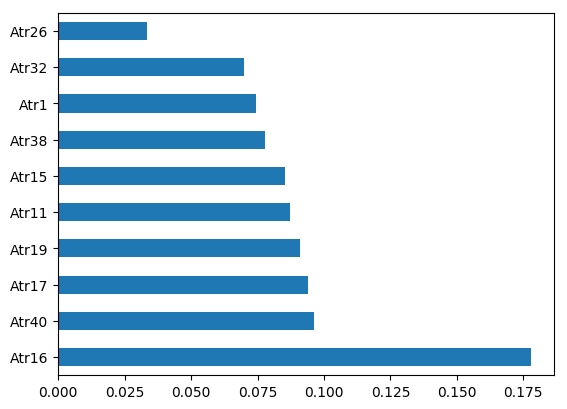

In [ ]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

**`Correlation Matrix with Heatmap`**

Correlation states how the features are related to each other or the target variable.
Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)
Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

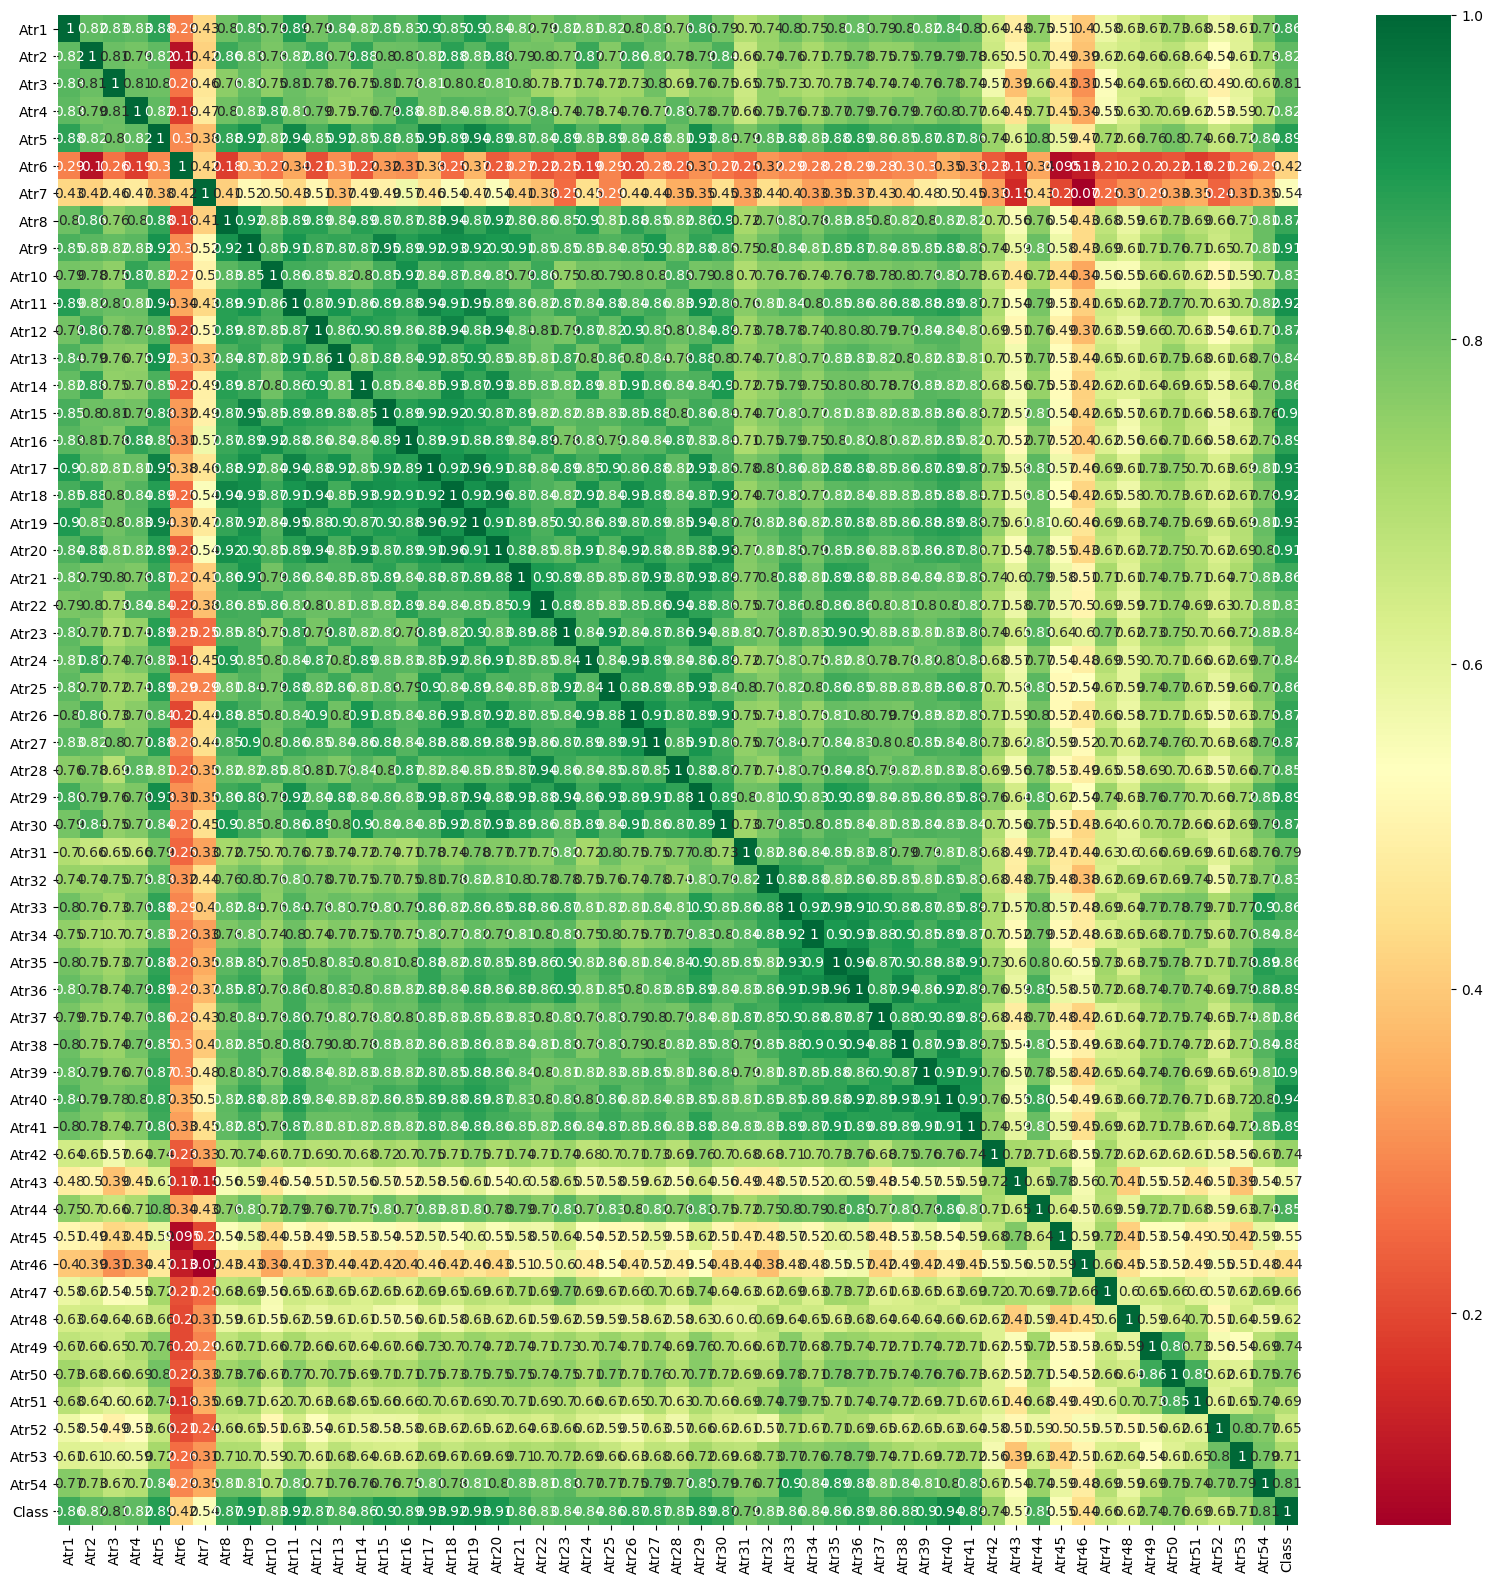

In [ ]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**PART 2**

In [ ]:
#pip install feature_selector

In [ ]:
#from feature_selector import FeatureSelector
# Features are in train and labels are in train_labels
fs = FeatureSelector(data = X, labels = y)

**Missing Values**

The first method for finding features to remove is straightforward: find features with a fraction of missing values above a specified threshold. The call below identifies features with more than 60% missing values (bold is output).

In [ ]:
#The first method for finding features to remove is straightforward: 
#find features with a fraction of missing values above a specified threshold. 
#The call below identifies features with more than 60% missing values (bold is output).

fs.identify_missing(missing_threshold = 0.6)


0 features with greater than 0.60 missing values.



**Collinear Features**

In [ ]:
#Collinear features are features that are highly correlated with one another. 
#In machine learning, these lead to decreased generalization performance on the 
#test set due to high variance and less model interpretability.


#The identify_collinear method finds collinear features based on a specified 
#correlation coefficient value. For each pair of correlated features, it identifies 
#one of the features for removal (since we only need to remove one):

#threshold?

fs.identify_collinear(correlation_threshold = 0.85)


37 features with a correlation magnitude greater than 0.85.



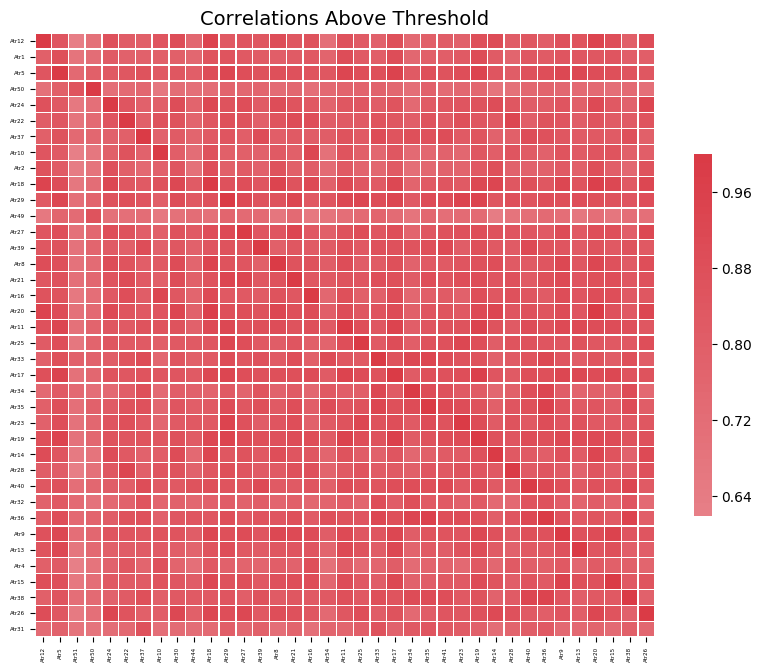

In [ ]:
#A neat visualization we can make with correlations is a heatmap. 
#This shows all the features that have at least one correlation above the threshold:

fs.plot_collinear()

In [ ]:
#As before, we can access the entire list of correlated features that 
#will be removed, or see the highly correlated pairs of features in a dataframe.

# list of collinear features to remove
collinear_features = fs.ops['collinear']

# dataframe of collinear features
fs.record_collinear.head()

,drop_feature,corr_feature,corr_value
0,Atr5,Atr1,0.881272
1,Atr8,Atr2,0.864284
2,Atr8,Atr5,0.877584
3,Atr9,Atr5,0.916327
4,Atr9,Atr8,0.915301


**Zero Importance Features**

The previous two methods can be applied to any structured dataset and are deterministic — the results will be the same every time for a given threshold. The next method is designed only for supervised machine learning problems where we have labels for training a model and is non-deterministic. The identify_zero_importance function finds features that have zero importance according to a gradient boosting machine (GBM) learning model.

With tree-based machine learning models, such as a boosting ensemble, we can find feature importances. The absolute value of the importance is not as important as the relative values, which we can use to determine the most relevant features for a task. We can also use feature importances for feature selection by removing zero importance features. In a tree-based model, the features with zero importance are not used to split any nodes, and so we can remove them without affecting model performance.

The FeatureSelector finds feature importances using the gradient boosting machine from the LightGBM library. The feature importances are averaged over 10 training runs of the GBM in order to reduce variance. Also, the model is trained using early stopping with a validation set (there is an option to turn this off) to prevent overfitting to the training data.

In [ ]:
# Pass in the appropriate parameters
fs.identify_zero_importance(task = 'classification', 
                            eval_metric = 'auc', 
                            n_iterations = 10, 
                             early_stopping = True)
# list of zero importance features
zero_importance_features = fs.ops['zero_importance']

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[24]	valid_0's auc: 0.993939
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[6]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[21]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[2]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[2]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[14]	valid_0's auc: 1
Trai

The parameters we pass in are as follows:
task : either “classification” or “regression” corresponding to our problem
eval_metric: metric to use for early stopping (not necessary if early stopping is disabled)
n_iterations : number of training runs to average the feature importances over
early_stopping: whether or not use early stopping for training the model
This time we get two plots with plot_feature_importances:

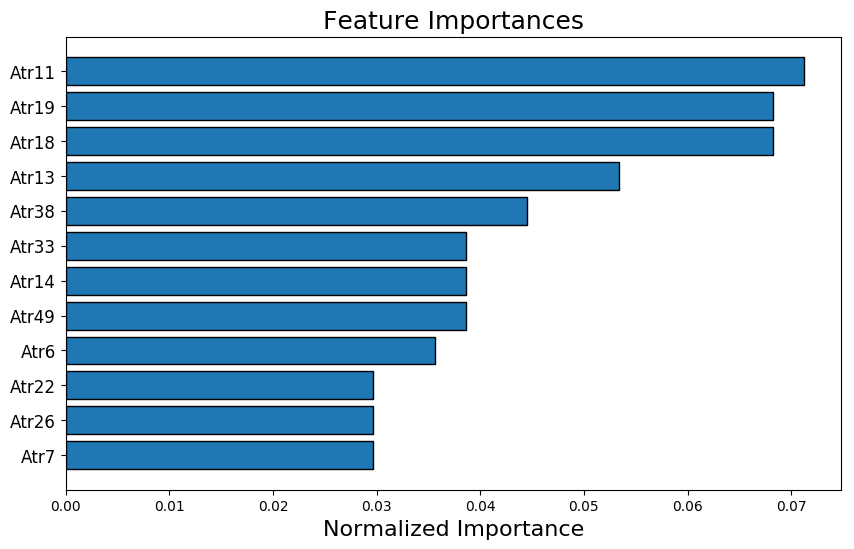

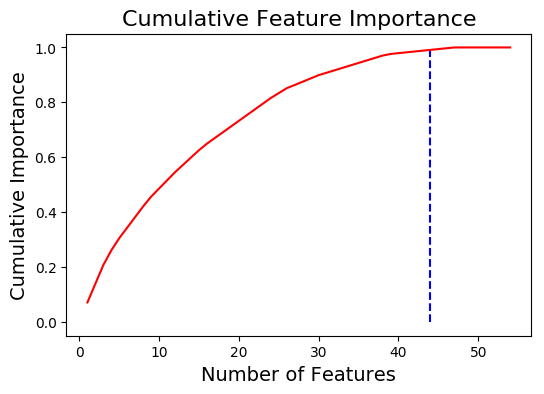

44 features required for 0.99 of cumulative importance


In [ ]:
# plot the feature importances
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

On the left we have the plot_n most important features (plotted in terms of normalized importance where the total sums to 1). On the right we have the cumulative importance versus the number of features. The vertical line is drawn at threshold of the cumulative importance, in this case 99%.

Two notes are good to remember for the importance-based methods:

Training the gradient boosting machine is stochastic meaning the feature importances will change every time the model is run

This should not have a major impact (the most important features will not suddenly become the least) but it will change the ordering of some of the features. It also can affect the number of zero importance features identified. Don’t be surprised if the feature importances change every time!

To train the machine learning model, the features are first one-hot encoded. This means some of the features identified as having 0 importance might be one-hot encoded features added during modeling.

When we get to the feature removal stage, there is an option to remove any added one-hot encoded features. However, if we are doing machine learning after feature selection, we will have to one-hot encode the features anyway!

**Low Importance Features**

The next method builds on zero importance function, using the feature importances from the model for further selection. The function identify_low_importance finds the lowest importance features that do not contribute to a specified total importance.

For example, the call below finds the least important features that are not required for achieving 99% of the total importance:

In [ ]:
fs.identify_low_importance(cumulative_importance = 0.99)

43 features required for cumulative importance of 0.99 after one hot encoding.
11 features do not contribute to cumulative importance of 0.99.



In [ ]:
fs.feature_importances.head(10)


,feature,importance,normalized_importance,cumulative_importance
0,Atr11,2.4,0.071217,0.071217
1,Atr19,2.3,0.068249,0.139466
2,Atr18,2.3,0.068249,0.207715
3,Atr13,1.8,0.053412,0.261128
4,Atr38,1.5,0.044510,0.305638
5,Atr33,1.3,0.038576,0.344214
6,Atr14,1.3,0.038576,0.382789
7,Atr49,1.3,0.038576,0.421365
8,Atr6,1.2,0.035608,0.456973
9,Atr22,1.0,0.029674,0.486647


The low_importance method borrows from one of the methods of using Principal Components Analysis (PCA) where it is common to keep only the PC needed to retain a certain percentage of the variance (such as 95%). The percentage of total importance accounted for is based on the same idea.

The feature importance based methods are really only applicable if we are going to use a tree-based model for making predictions. Besides being stochastic, the importance-based methods are a black-box approach in that we don’t really know why the model considers the features to be irrelevant. If using these methods, run them several times to see how the results change, and perhaps create multiple datasets with different parameters to test!

**Single Unique Value Features**

The final method is fairly basic: find any columns that have a single unique value. A feature with only one unique value cannot be useful for machine learning because this feature has zero variance. For example, a tree-based model can never make a split on a feature with only one value (since there are no groups to divide the observations into).

There are no parameters here to select, unlike the other methods:

In [ ]:
fs.identify_single_unique()

0 features with a single unique value.



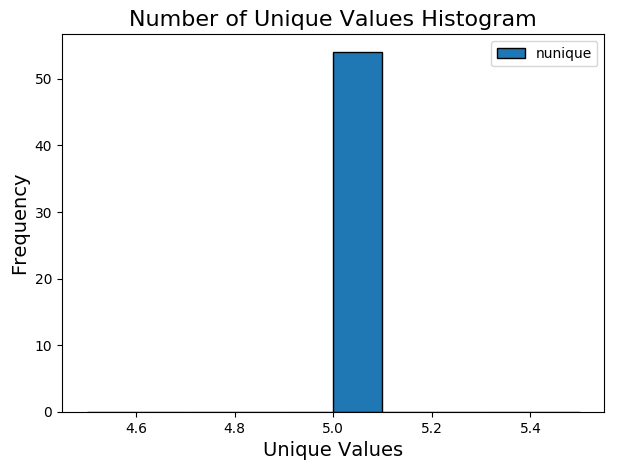

In [ ]:
fs.plot_unique()


**Removing Features**

Once we’ve identified the features to discard, we have two options for removing them. All of the features to remove are stored in the ops dict of the FeatureSelector and we can use the lists to remove features manually. Another option is to use the remove built-in function.

For this method, we pass in the methods to use to remove features. If we want to use all the methods implemented, we just pass in methods = 'all'.

In [ ]:
# Remove the features from all methods (returns a df)
train_removed = fs.remove(methods = 'all')

['missing', 'collinear', 'zero_importance', 'low_importance', 'single_unique'] methods have been run

Removed 40 features.


This method returns a dataframe with the features removed. To also remove the one-hot encoded features that are created during machine learning:

In [ ]:
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)
train_removed_all.head()

['missing', 'collinear', 'zero_importance', 'low_importance', 'single_unique'] methods have been run

Removed 40 features including one-hot features.


,Atr1,Atr3,Atr4,Atr6,Atr7,Atr31,Atr32,Atr43,Atr45,Atr46,Atr47,Atr48,Atr49,Atr52
0,2,4,1,0,0,1,2,1,3,2,1,3,3,3
1,4,4,4,0,0,0,4,3,2,2,2,3,4,4
2,2,2,2,3,2,3,3,2,2,3,2,3,1,2
3,3,3,2,3,3,2,3,3,3,2,2,3,3,2
4,2,1,1,1,0,1,1,3,2,2,1,2,3,2


It might be a good idea to check the features that will be removed before going ahead with the operation! The original dataset is stored in the data attribute of the FeatureSelector as a back-up!

In [ ]:
train_removed_all.shape

(170, 14)

**LOGISTIC REGRESSION**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_removed_all, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
y_pred_logreg = logreg.predict(X_test)
Logistic = logreg.score(X_test, y_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


In [ ]:
confusion_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print(confusion_matrix_logreg)

[[23  4]
 [ 3 21]]


In [ ]:
print(classification_report(y_test, y_pred_logreg))

             precision    recall  f1-score   support

          0       0.88      0.85      0.87        27
          1       0.84      0.88      0.86        24

avg / total       0.86      0.86      0.86        51



In [ ]:
# calculate the fpr and tpr for all thresholds of the classification
model_lg = logreg.fit(X_train, y_train)
probs = model_lg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


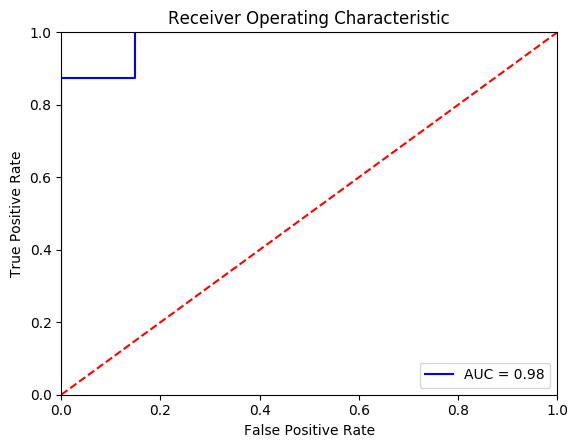

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**LINEAR DISCRIMINANT ANALYSIS**

In [ ]:
lda = LinearDiscriminantAnalysis()
model_lda = lda.fit(X_train, y_train)

print(model_lda.priors_)

[0.49579832 0.50420168]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred_lda = model_lda.predict(X_test)
print(np.unique(y_pred_lda, return_counts=True))

(array([0, 1]), array([30, 21]))


In [ ]:
print(confusion_matrix(y_pred_lda, y_test))
print(classification_report(y_test, y_pred_lda, digits=3))

[[26  4]
 [ 1 20]]
             precision    recall  f1-score   support

          0      0.867     0.963     0.912        27
          1      0.952     0.833     0.889        24

avg / total      0.907     0.902     0.901        51



In [ ]:
Linear = accuracy_score(y_test, y_pred_lda)
print(Linear)

0.9019607843137255


**QUADRATIC DISCRIMINANT ANALYSIS**

In [ ]:
qda = QuadraticDiscriminantAnalysis()
model_qda = qda.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [ ]:
y_pred_qda = model_qda.predict(X_test)
print(np.unique(y_pred_qda, return_counts=True))
print(confusion_matrix(y_pred_qda, y_test))
print(classification_report(y_test, y_pred_qda, digits=3))

(array([0, 1]), array([28, 23]))
[[25  3]
 [ 2 21]]
             precision    recall  f1-score   support

          0      0.893     0.926     0.909        27
          1      0.913     0.875     0.894        24

avg / total      0.902     0.902     0.902        51



In [ ]:
Quadratic = accuracy_score(y_test, y_pred_qda)
print(Quadratic)

0.9019607843137255


**K-Nearest Neighbors**

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)


In [ ]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [ ]:
y_pred_knn = knn.predict(X_test)


In [ ]:
#!pip install pandas==0.25.3


In [ ]:
#print(pd.__version__)


In [ ]:
actual = y_test.to_numpy()


In [ ]:
mse = (((y_pred_knn - actual) ** 2).sum()) / len(y_pred_knn)
mse

0.0688235294117647

In [ ]:
knn_10 = accuracy_score(actual, y_pred_knn.round())
knn_10

0.9215686274509803

**Random Forest**

In [ ]:
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
rfc_predict = rfc.predict(X_test)

In [ ]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring= 'roc_auc')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 

In [ ]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[27  0]
 [ 4 20]]


=== Classification Report ===
             precision    recall  f1-score   support

          0       0.87      1.00      0.93        27
          1       1.00      0.83      0.91        24

avg / total       0.93      0.92      0.92        51



=== All AUC Scores ===
[0.94444444 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9944444444444445


In [ ]:
RandomForest = accuracy_score(y_test, rfc_predict)
print(RandomForest)

0.9215686274509803


**DEEP NEURAL NETWORK**

In [ ]:
dataframe = data

In [ ]:
train, test = train_test_split(dataframe, test_size=0.3)
train, val = train_test_split(train, test_size=0.3)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

83 train examples
36 validation examples
51 test examples


In [ ]:
feature_columns = []

# numeric cols
for header in ['Atr1', 'Atr2', 'Atr3', 'Atr4', 'Atr5', 'Atr6', 'Atr7', 'Atr8', 'Atr9', 'Atr10', 
               'Atr11', 'Atr12', 'Atr13', 'Atr14', 'Atr15', 'Atr16', 'Atr17', 'Atr18', 'Atr19', 'Atr20', 
               'Atr21', 'Atr22', 'Atr23', 'Atr24', 'Atr25', 'Atr26', 'Atr27', 'Atr28', 'Atr29', 'Atr30', 
               'Atr31', 'Atr32', 'Atr33', 'Atr34', 'Atr35', 'Atr36', 'Atr37', 'Atr38', 'Atr39', 'Atr40', 
               'Atr41', 'Atr42', 'Atr43', 'Atr44', 'Atr45', 'Atr46', 'Atr47', 'Atr48', 'Atr49', 'Atr50', 
               'Atr51', 'Atr52', 'Atr53', 'Atr54']:
  feature_columns.append(feature_column.numeric_column(header))

In [ ]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [ ]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('Class')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [ ]:
batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [ ]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_ds,
          validation_data=val_ds,
          epochs=5)

Epoch 1/5
3/3 [==============================] - 2s 650ms/step - loss: 0.5068 - accuracy: 0.6024 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
3/3 [==============================] - 0s 18ms/step - loss: 0.3326 - accuracy: 0.8916 - val_loss: 0.2414 - val_accuracy: 0.9722
Epoch 3/5
3/3 [==============================] - 0s 17ms/step - loss: 0.2117 - accuracy: 0.9759 - val_loss: 0.1395 - val_accuracy: 1.0000
Epoch 4/5
3/3 [==============================] - 0s 17ms/step - loss: 0.1508 - accuracy: 0.9759 - val_loss: 0.0922 - val_accuracy: 1.0000
Epoch 5/5
3/3 [==============================] - 0s 18ms/step - loss: 0.0962 - accuracy: 0.9759 - val_loss: 0.0664 - val_accuracy: 0.9722


In [ ]:
loss, accuracy_dnn = model.evaluate(test_ds)
print("Accuracy", accuracy_dnn)

2/2 [==============================] - 0s 7ms/step - loss: 0.1061 - accuracy: 0.9608
Accuracy 0.9607843


**COMPARISON**

In [ ]:
Comparison = pd.DataFrame({'Logistic Regression': [Logistic], 
                           'Linear Discriminant Analysis': [Linear], 
                           'Quadratic Discriminant Analysis': [Quadratic], 
                            'K-Nearest Neighbors': [knn_10],
                           'Random Forest': [RandomForest],
                           'Deep Neural Network': [accuracy_dnn]
                           }, index = None)
Comparison

,Logistic Regression,Linear Discriminant Analysis,Quadratic Discriminant Analysis,K-Nearest Neighbors,Random Forest,Deep Neural Network
0,0.862745,0.901961,0.901961,0.921569,0.921569,0.960784
